In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

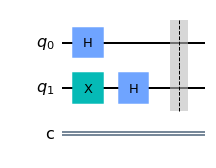

In [2]:
circuit = QuantumCircuit(2, 1)

circuit.h(0)
circuit.x(1)
circuit.h(1)

circuit.barrier()

circuit.draw()

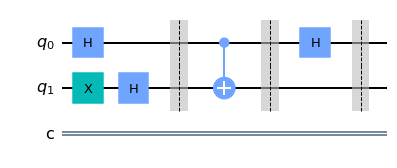

In [3]:
circuit.cx(0, 1)

circuit.barrier()

circuit.h(0)

circuit.barrier()

circuit.draw()

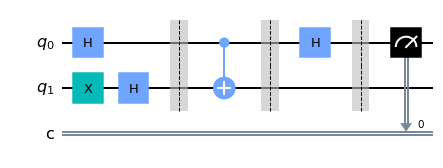

In [4]:
circuit.measure(0,0)

circuit.draw()

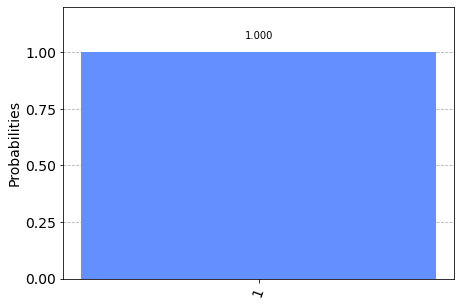

In [6]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram([result.get_counts(circuit)])

In [7]:
# Real Quantum Computer

In [8]:
provide = IBMQ.get_provider("ibm-q")

for backend in provide.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 0 & simulated qubits
ibmqx2 : 0 & 5 qubits
ibmq_16_melbourne : 28 & 15 qubits
ibmq_armonk : 5 & 1 qubits
ibmq_athens : 13 & 5 qubits
ibmq_santiago : 21 & 5 qubits
ibmq_lima : 13 & 5 qubits
ibmq_belem : 1 & 5 qubits
ibmq_quito : 5 & 5 qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibmq_manila : 6 & 5 qubits


In [9]:
quantum_computer = provide.get_backend("ibmqx2")

In [11]:
quantum_result = execute(circuit, backend=quantum_computer, shots=1024).result()

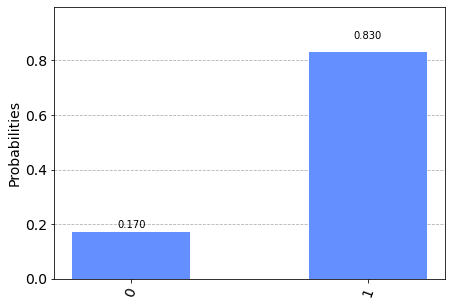

In [13]:
quantum_counts = quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])